In [ ]:
!gdown 1ZJkoYmYBjUEcTPnW00gMfiJ9cTltb-II

Downloading...
From: https://drive.google.com/uc?id=1ZJkoYmYBjUEcTPnW00gMfiJ9cTltb-II
To: /content/FordA_TEST.tsv
100% 7.36M/7.36M [00:00<00:00, 178MB/s]


In [ ]:
!gdown 1PPZ0IPpVIWymL1tf0YEud2fuJGK-0FVI

Downloading...
From: https://drive.google.com/uc?id=1PPZ0IPpVIWymL1tf0YEud2fuJGK-0FVI
To: /content/FordA_TRAIN.tsv
100% 20.1M/20.1M [00:00<00:00, 129MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Load the data: the FordA dataset

### Dataset description

Bộ dataset mà chúng ta sử dụng trong trường hợp này được gọi là FordA, lấy từ kho lưu trữ UCR. Dataset này bao gồm 3601 mẫu cho việc huấn luyện và 1320 mẫu cho việc kiểm thử. Mỗi timeseries trong dataset đại diện cho dữ liệu tiếng ồn động cơ được thu thập thông qua cảm biến động cơ. Mục tiêu của task này là tự động phát hiện các sự cố động cơ. Đây là một bài toán balanced binary classification. Các bạn có thể tìm hiểu chi tiết về dataset này [tại đây](http://www.j-wichard.de/publications/FordPaper.pdf).

### Read the TSV data

Chúng ta sẽ dùng file FordA_TRAIN để huấn luyện và file FordA_TEST để kiểm thử. Sự đơn giản của dataset này giúp chúng ta dễ dàng minh họa hiệu quả của việc áp dụng XGBoost cho việc phân loại timeseries. Trong các tệp này, cột đầu tiên chứa nhãn của dữ liệu.

In [ ]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)

x_train, y_train = readucr("FordA_TRAIN.tsv")
x_test, y_test = readucr("FordA_TEST.tsv")

In [ ]:
x_train.shape

(3601, 500)

In [ ]:
y_train.shape

(3601,)

## Visualize the data

Ở đây chúng ta sẽ trực quan hóa một sample timeseries cho mỗi class trong dataset.



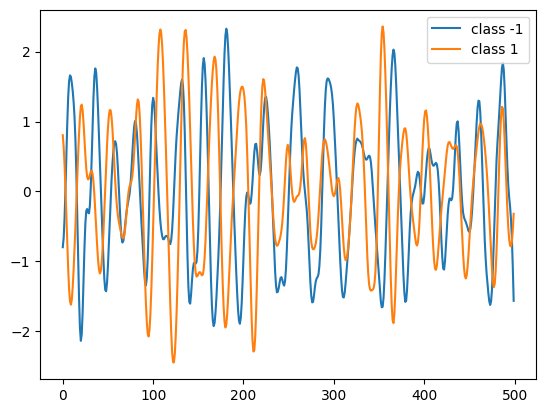

In [ ]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

Đối với dataset này, dữ liệu đã được chuẩn hóa: mỗi sample có trung bình bằng không và độ lệch chuẩn bằng một.

Lưu ý rằng dữ liệu timeseries được sử dụng ở đây là univariate, có nghĩa là chúng ta chỉ có một kênh cho mỗi sample.


In [ ]:
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

## XGBoost Model

In [ ]:
model = XGBClassifier(n_estimators=200, random_state=42)
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

## Evaluation

In [ ]:
y_pred = model.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
y_pred

,Predicted
0,0
1,0
2,1
3,1
4,0
...,...
1315,0
1316,1
1317,1
1318,0


In [ ]:
y_test = pd.DataFrame(y_test, columns=['target'])
y_test

,target
0,0
1,0
2,0
3,1
4,0
...,...
1315,0
1316,1
1317,1
1318,1


In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[550 131]
 [139 500]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       681
           1       0.79      0.78      0.79       639

    accuracy                           0.80      1320
   macro avg       0.80      0.80      0.80      1320
weighted avg       0.80      0.80      0.80      1320



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80
